In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()
data_dir = Path(cached_dirs.cache_dir, 'rfm/by_toolevents/iteration5')

In [3]:
df = pd.read_csv(
    Path(data_dir, 'unclassified_user_data.csv'),
    index_col=False
)
display(df)

,index,Unnamed: 0,user,first_start_date,last_start_date,first_finish_date,last_finish_date,job_count,superjob_count,job_event_days,superjob_event_days,last_superjob_start_date,toolevents__lifetime,start_datetime
0,19,19,061962588x,2021-04-28 01:54:30,2021-05-27 01:09:33,2021-04-28 03:31:52,2021-05-27 11:19:13,40,NaN,5,NaN,NaN,29,2021-05-27 01:09:33
1,20,20,061972018x,2021-04-28 02:17:04,2021-05-27 01:13:31,2021-04-28 02:40:49,2021-05-28 01:20:45,66,NaN,4,NaN,NaN,29,2021-05-27 01:13:31
2,26,26,0808wodlr,2020-11-10 00:04:08,2020-12-08 23:24:41,2020-11-11 00:12:54,2020-12-09 23:28:55,13,NaN,2,NaN,NaN,29,2020-12-08 23:24:41
3,92,92,12422rahulkumar,2020-09-25 04:02:01,2021-01-05 04:31:11,2020-09-26 07:49:27,2021-01-06 04:38:54,172,NaN,6,NaN,NaN,103,2021-01-05 04:31:11
4,110,110,13rahul129,2021-05-13 00:20:48,2021-06-04 12:43:29,2021-05-14 00:23:50,2021-06-04 12:58:37,125,NaN,9,NaN,NaN,22,2021-06-04 12:43:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,155197,155197,zyliu06,2020-01-21 13:27:47,2021-07-24 03:28:53,2020-01-23 00:48:30,2021-07-25 08:39:07,509,NaN,7,NaN,NaN,550,2021-07-24 03:28:53
7740,155226,155226,zyzhu,2021-01-30 00:58:07,2021-06-16 11:26:48,2021-01-31 01:11:58,2021-06-17 11:27:52,7,NaN,2,NaN,NaN,138,2021-06-16 11:26:48
7741,155258,155258,zzhang81,2020-08-26 12:11:38,2020-09-02 12:22:57,2020-08-26 12:12:35,2020-09-03 13:50:35,193,NaN,2,NaN,NaN,8,2020-09-02 12:22:57
7742,155268,155268,zzhou436,2021-06-21 06:37:27,2021-07-25 08:57:28,2021-06-22 06:37:51,2021-07-26 10:37:37,28,NaN,8,NaN,NaN,35,2021-07-25 08:57:28


In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
recency_df = df[['user', 'toolevents__lifetime']].copy()
recency_df['Recency'] = recency_df['toolevents__lifetime']

users = pd.merge(users, recency_df[['user','Recency', 'toolevents__lifetime']], on='user')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


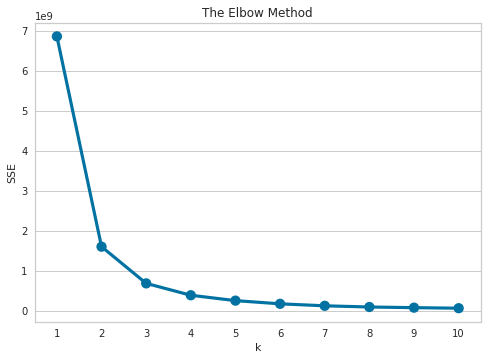

In [6]:
elbow_curve(users[['Recency']])

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])

In [8]:
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,6287.0,111.617942,161.704026,2.0,11.0,36.0,135.0,753.0
1,471.0,3569.619958,793.070297,2485.0,2905.0,3424.0,4104.5,5607.0
2,986.0,1394.429006,475.002903,755.0,990.5,1308.0,1747.5,2481.0


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,952.0,992.713235,306.823803,540.0,732.00,945.0,1249.00,1642.0
1,472.0,2296.421610,437.019181,1644.0,1881.75,2229.0,2653.25,3157.0
2,297.0,4028.316498,636.204131,3163.0,3470.00,3878.0,4513.00,5607.0
3,6023.0,88.420389,119.599789,2.0,10.00,34.0,108.00,539.0


In [10]:
users.to_csv(
    Path(data_dir, "recency-clustered.csv"),
    index=False,
    index_label=False
)

In [11]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Recency']])
display(X_scaled)

array([[0.00481713],
       [0.00481713],
       [0.00481713],
       ...,
       [0.00107047],
       [0.0058876 ],
       [0.0103479 ]])

Score for number of cluster(s) 2: -50.91711629264083
Silhouette score for number of cluster(s) 2: 0.8386860155803045
Davies Bouldin score for number of cluster(s) 2: 0.40174492595332456


'Centroids - '

[[0.03608837]
 [0.51716703]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -21.71792568918902
Silhouette score for number of cluster(s) 3: 0.8002363640012866
Davies Bouldin score for number of cluster(s) 3: 0.45921160078079515


'Centroids - '

[[0.0192501 ]
 [0.63404792]
 [0.24529574]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -12.269402106637207
Silhouette score for number of cluster(s) 4: 0.7814322789013771
Davies Bouldin score for number of cluster(s) 4: 0.4866042751808074


'Centroids - '

[[0.40689365]
 [0.01539177]
 [0.71525188]
 [0.17634184]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -7.989061257087865
Silhouette score for number of cluster(s) 5: 0.7596279804195719
Davies Bouldin score for number of cluster(s) 5: 0.4920770903887831


'Centroids - '

[[0.01291247]
 [0.53388057]
 [0.30081792]
 [0.79500861]
 [0.1340377 ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -5.4530587616012
Silhouette score for number of cluster(s) 6: 0.7445325837117338
Davies Bouldin score for number of cluster(s) 6: 0.4783824374180126


'Centroids - '

[[0.82608841]
 [0.01059221]
 [0.24095319]
 [0.6019023 ]
 [0.10352573]
 [0.41187665]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -3.868900195921282
Silhouette score for number of cluster(s) 7: 0.7226161601491786
Davies Bouldin score for number of cluster(s) 7: 0.48314370202556517


'Centroids - '

[[0.0077241 ]
 [0.44283161]
 [0.16356081]
 [0.84018848]
 [0.06716368]
 [0.28159622]
 [0.62615387]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -2.927477390687657
Silhouette score for number of cluster(s) 8: 0.7156405749559109
Davies Bouldin score for number of cluster(s) 8: 0.4778679020507659


'Centroids - '

[[0.00685481]
 [0.48690222]
 [0.22895127]
 [0.64225071]
 [0.34763831]
 [0.13375548]
 [0.84473206]
 [0.056389  ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -2.3959478295355146
Silhouette score for number of cluster(s) 9: 0.7160467703511375
Davies Bouldin score for number of cluster(s) 9: 0.48278635081924004


'Centroids - '

[[0.00700075]
 [0.75174197]
 [0.23026543]
 [0.13609035]
 [0.05786074]
 [0.47354566]
 [0.90326428]
 [0.34562268]
 [0.6059153 ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -1.961905305935876
Silhouette score for number of cluster(s) 10: 0.7120285101243199
Davies Bouldin score for number of cluster(s) 10: 0.48462680491558296


'Centroids - '

[[0.00678648]
 [0.49104116]
 [0.12809614]
 [0.765835  ]
 [0.21166184]
 [0.05510333]
 [0.61973837]
 [0.38961885]
 [0.29682865]
 [0.90884924]]
----------------------------------------------------------------------------------------------------


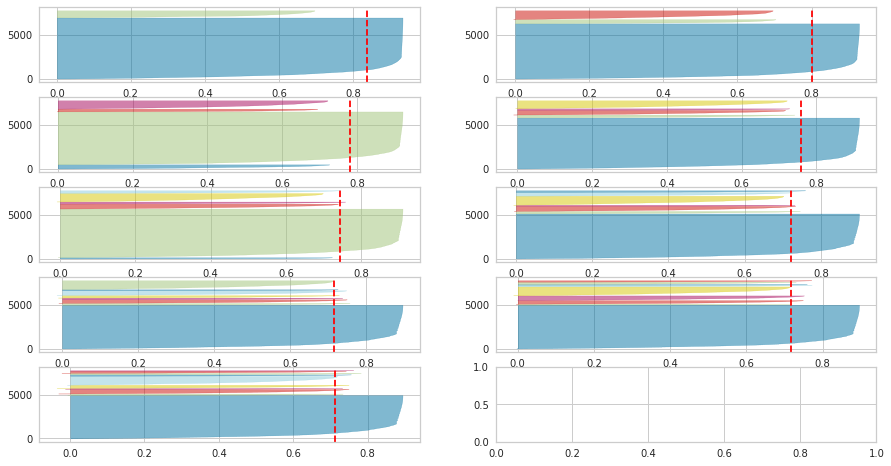

In [12]:
display_cluster_info(X_scaled)